In [7]:
import sys, os
sys.path.append(os.path.abspath("../src"))

import pandas as pd
from data_preprocessing import (
    load_and_clean_trader_data,
    load_and_clean_sentiment_data,
    merge_datasets
)
from analysis_utils import (
    plot_pnl_by_sentiment,
    correlation_heatmap,
    trade_activity_bar
)

In [9]:
# --- Load datasets and merge on Date ---

trader_path = r"C:\Users\nisha\Downloads\historical_data.csv"
sentiment_path = r"C:\Users\nisha\Downloads\fear_greed_index.csv"

trader_df = load_and_clean_trader_data(trader_path)
sentiment_df = load_and_clean_sentiment_data(sentiment_path)
# Ensure the 'Date' column in trader_df is converted to datetime for proper merging
trader_df['Date'] = pd.to_datetime(trader_df['Date'], errors='coerce')

# Merge the datasets on the 'Date' column
merged_df = merge_datasets(trader_df, sentiment_df)

print("Merged Dataset Shape:", merged_df.shape)
display(merged_df.head())

Merged Dataset Shape: (211224, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed


In [10]:
# --- Average PnL per sentiment class ---

merged_df['classification'] = merged_df['classification'].fillna('Unknown')

avg_pnl = (
    merged_df.groupby('classification')['Closed PnL']
    .mean()
    .sort_values(ascending=False)
)

print("=== Average Closed PnL by Sentiment ===\n")
print(avg_pnl)

=== Average Closed PnL by Sentiment ===

classification
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Unknown           38.048303
Neutral           27.088803
Extreme Fear       1.891632
Name: Closed PnL, dtype: float64


C:\Users\nisha\AppData\Local\Temp\ipykernel_18076\1223508067.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


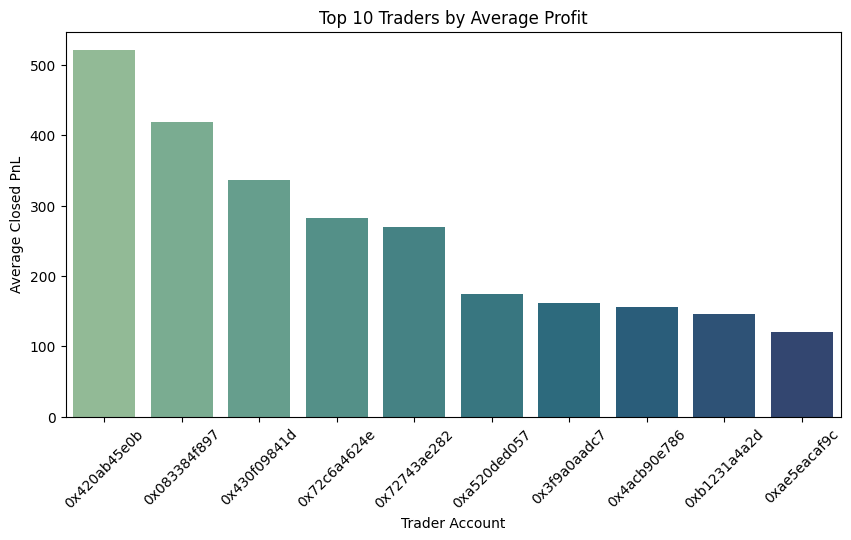

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Aggregate PnL by trader account
trader_pnl = (
    merged_df.groupby("Account")["Closed PnL"]
    .agg(["mean", "count"])
    .reset_index()
    .sort_values("mean", ascending=False)
    .head(10)
)

trader_pnl["account_short"] = trader_pnl["Account"].astype(str).str.slice(0, 12)

plt.figure(figsize=(10, 5))
sns.barplot(
    x="account_short",
    y="mean",
    data=trader_pnl,
    palette="crest"
)
plt.title("Top 10 Traders by Average Profit")
plt.ylabel("Average Closed PnL")
plt.xlabel("Trader Account")
plt.xticks(rotation=45)
plt.show()

C:\Users\nisha\AppData\Local\Temp\ipykernel_18076\345403463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Side", data=merged_df, palette="muted")


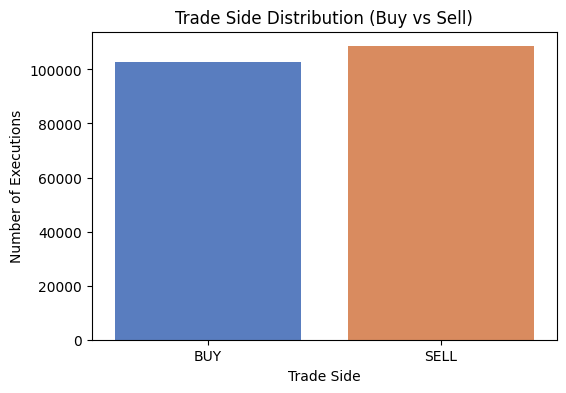

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Side", data=merged_df, palette="muted")
plt.title("Trade Side Distribution (Buy vs Sell)")
plt.xlabel("Trade Side")
plt.ylabel("Number of Executions")
plt.show()

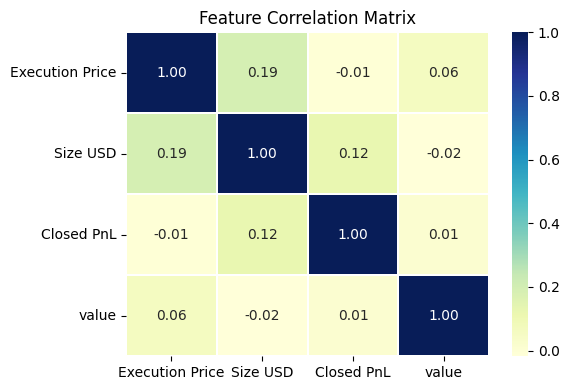

In [13]:
# --- Correlation heatmap ---

numeric_cols = ['Execution Price', 'Size USD', 'Closed PnL', 'value']
correlation_heatmap(merged_df, numeric_cols)